In [1]:
#Angela María Arias Rojas 201728551
#Raúl Andrés Pardo Moreno 201727367

# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [105]:
import zipfile
with zipfile.ZipFile('C:/Users/harol/Desktop/Disco Duro/Angela/Maestria/Intersemestral/Deep Learning/GitHub/AppliedDeepLearningClass-master/datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [106]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [107]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [108]:
X = data.drop(['Label'], axis=1)
y = data['Label']

In [109]:
X.shape

(138721, 15)

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [110]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))




0.993973645512


In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))

precision_score  0.0
recall_score     0.0


C:\Users\harol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
#F1-Score
print('f1_score    ', f1_score(y_test, y_pred_class))

f1_score     0.0


C:\Users\harol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [113]:
#F_Beta-Score (Beta=10)

print('f_Beta-Score    ', fbeta_score(y_test, y_pred_class, beta=10))

f_Beta-Score     0.0


C:\Users\harol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
#Despues de estimar la Regresión Logística, encontramos que el Accuracy del modelo es 0.993973645512, el F1-Score es 0 y el 
#F_Beta-Score (Beta=10) es 0. Los resultados anteriores muestran que los datos estan desbalanceados:
#Solo el 0.5% de los datos toman el valor de 1, lo que conlleva a que las predicciones del modelo sean siempre 0 dado que el 
#modelo se equivocará el 0.5% de las veces.
#Por lo anterior se deben balancear los datos para obtener modelos que predigan el fraude. 

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [115]:
n_samples = y.shape[0]
print(n_samples)

138721


In [116]:
n_samples_0 = (y == 0).sum()
n_samples_0

137924

In [117]:
n_samples_1 = (y == 1).sum()
n_samples_1

797

In [118]:
n_samples_1 / n_samples

0.0057453449730033666

In [119]:
n_samples_0_new =  n_samples_1 / 0.5 - n_samples_1
n_samples_0_new

797.0

In [120]:
n_samples_0_new_per = n_samples_0_new / n_samples_0
n_samples_0_new_per

0.0057785447057799944

In [121]:
# Select all negatives
filter_ = y == 0

# Random sample
np.random.seed(42)
rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)

# Combine
filter_ = filter_ & rand_1

In [122]:
filter_.sum()

757

In [123]:
filter_ = filter_ | (y == 1)

In [124]:
filter_ = filter_.astype(bool)

In [125]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate some data
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           #n_informative=3, n_redundant=1, flip_y=0,
                           #n_features=20, n_clusters_per_class=1,
                           #n_samples=138721, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X)


# Plot the original data

def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

#plot_two_classes(x_vis, y)


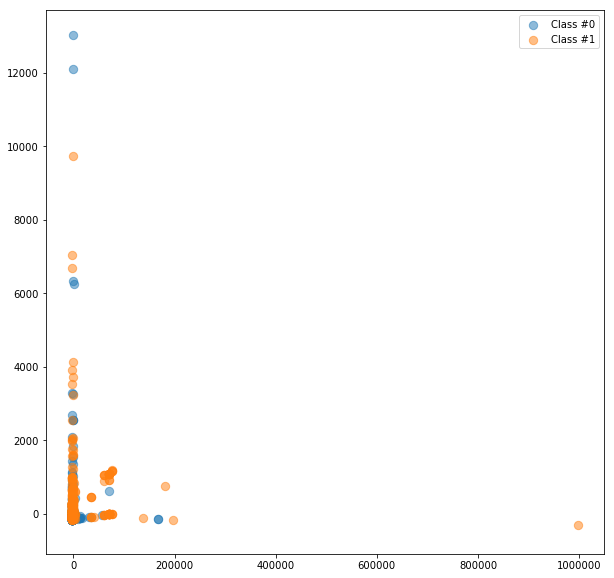

In [77]:
plot_two_classes(x_vis[filter_], y[filter_])

In [126]:
#Generación de las nuevas variables X y Y que contiene el under sampling. Las nuevas variables tienen cada una 1154 observaciones
NewXtrain=X_train[filter_]
NewYtrain=y_train[filter_]
#NewXtrain.shape, NewYtrain.shape

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(C=1e9)
logreg1.fit(NewXtrain, NewYtrain)

# make predictions for testing set
y_pred1_class = logreg1.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred1_class))


0.532827773132


C:\Users\harol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [79]:
#Despues de sub muestrear la clase negativa usando random-under-sampling, encontramos lo siguiente:
#El parámetro para el target_percentage que escogimos fue el 50%. Al ejecutar el modelo nuevamente encontramos que el 
#testing accuracy resulta ser de 0.5328. Esta medida de desempeño comparada con la original (antes de sub muestrear, la cual
#resulta ser de 0.9939) no es mejor. Sin embargo, Rescormdemos que inicialmente la variable respuesta estaba desbalanceada por lo
#que era de esperarse un accuracy alto. Finalmente en las predicciones encontramos que ya el modelo predice la detección de 
#fraude (y=1), lo cual antes no estaba ocurriendo.

# Exercice 04.3

Now using random-over-sampling

In [127]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1over_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_over = np.random.choice(X[y == 1].shape[0], int(n_samples_1over_new))
    # filter_ is within the positives, change to be of all
    filter_over = np.nonzero(y == 1)[0][filter_over]
    
    filter_over = np.concatenate((filter_over, np.nonzero(y == 0)[0]), axis=0)
        
    return X[filter_over], y[filter_over]

Target percentage 0.1
y.shape =  153248 y.mean() =  0.09999477970348716


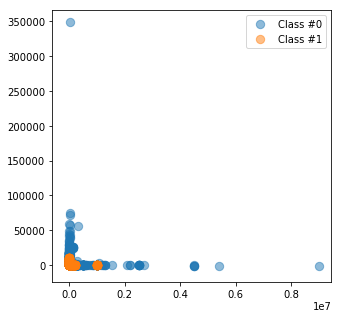

Target percentage 0.2
y.shape =  172405 y.mean() =  0.2


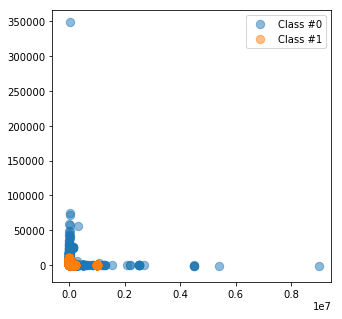

Target percentage 0.3
y.shape =  197034 y.mean() =  0.29999898494676047


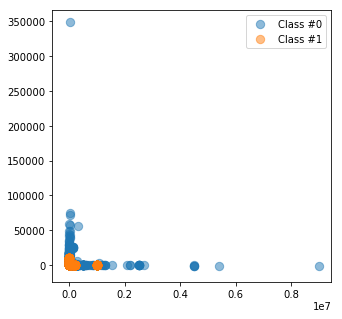

Target percentage 0.4
y.shape =  229873 y.mean() =  0.3999991299543661


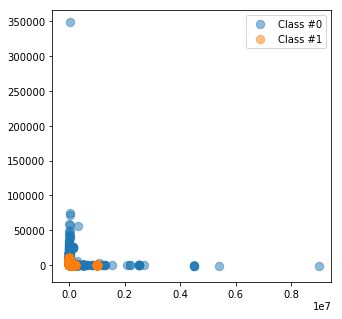

Target percentage 0.5
y.shape =  275848 y.mean() =  0.5


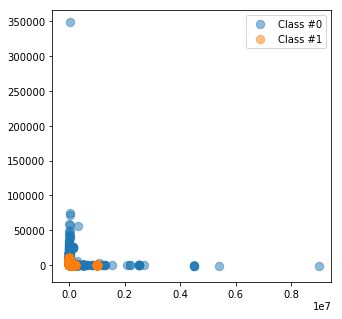

In [104]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(x_vis, y, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()    

In [98]:
n_samples = y.shape[0]
n_samples_0 = (y == 0).sum()
n_samples_1 = (y == 1).sum()

n_samples_1over_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

np.random.seed(3)
filter_over = np.random.choice(X[y == 1].shape[0], int(n_samples_1over_new))
    # filter_ is within the positives, change to be of all
filter_over = np.nonzero(y == 1)[0][filter_over]
    
filter_over = np.concatenate((filter_over, np.nonzero(y == 0)[0]), axis=0)
    

In [128]:
NewXtrain1.shape

(249698, 20)

In [100]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression(C=1e9)
logreg2.fit(NewXtrain1, NewYtrain1)


# make predictions for testing set
y_pred2_class = logreg2.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred2_class))


ValueError: X has 15 features per sample; expecting 20

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened